In [1]:
import numpy as np
from navigation import *

In [2]:
# blur = [gaussian_blur((17,17),7)]
# threshold = [adaptive_threshold(81, 5),
#              morph_close(kernel(9)),
#              morph_dilate(kernel(5), 2)]
# grid_size = 15

navigation = Indoor_Navigation('static/floor_plan_1.jpg',
                               'Demo floor plan',
                               grid_size=10)
navigation.save('static/navigation.pkl')

Number of doors: 4


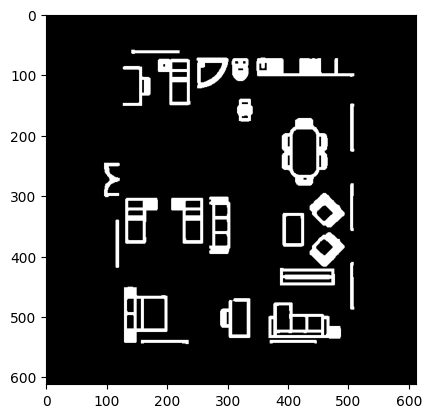

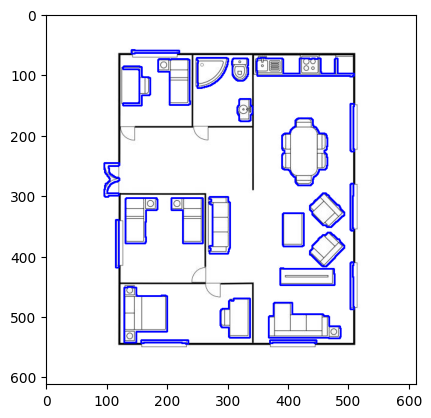

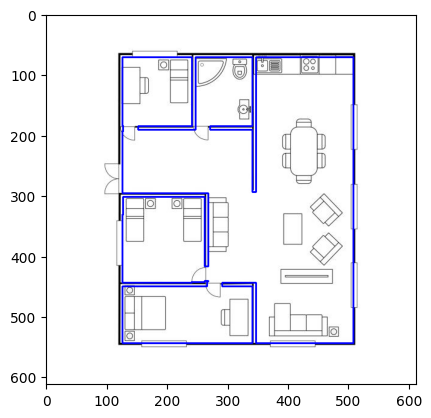

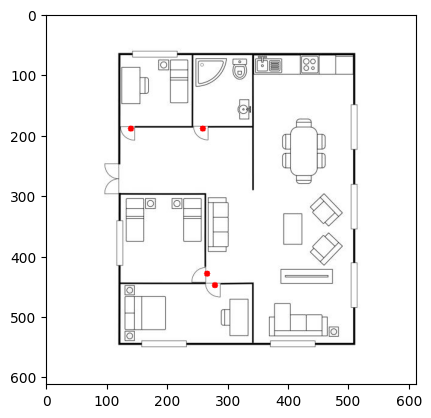

In [110]:
filters = [morph_close(kernel(3)),
             morph_open(kernel(80)),
             adaptive_threshold(21, 51),
             morph_open(kernel(3)),
             morph_close(kernel(20)),
             morph_dilate(kernel(5)),
             ]
walls_and_doors = apply_filters(navigation.image, filters)

filters = [gaussian_blur((17, 17), 7),
             adaptive_threshold(81, 5),
             morph_open(kernel(15)),
             morph_close(kernel(18)),
             ]
image_mask = apply_filters(navigation.image, filters)

# put the mask on the original image
doors_closed = cv2.bitwise_and(image_mask, walls_and_doors)

filters = [morph_close(kernel(22)),
          ]
doors_open = apply_filters(doors_closed, filters)

doors = cv2.bitwise_xor(doors_closed, doors_open)

filters = [morph_open(kernel(3)),
           #morph_dilate(kernel(5))
          ]
doors = apply_filters(doors, filters)

door_contours, _ = cv2.findContours(doors, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('Number of doors:', len(door_contours))

filters = [morph_dilate(kernel(3))
           ]
walls_doors_dilated = apply_filters(walls_and_doors, filters)

obstacles = cv2.bitwise_or(navigation.image, walls_doors_dilated)

filters = [morph_dilate(kernel(45))]
doors_dilated = apply_filters(doors, filters)
obstacles = cv2.bitwise_or(obstacles, doors_dilated)

filters = [morph_open(kernel(3)),
           gaussian_blur((5, 5), 5),
           adaptive_threshold(201, 3),]
obstacles = apply_filters(obstacles, filters)

filters = [morph_open(kernel(4)),
           morph_close(kernel(3))
           ]
obstacles = apply_filters(obstacles, filters)

plt.imshow(obstacles, cmap='gray')
plt.show()

# get contours of the obstacles
obstacle_contours, _ = cv2.findContours(obstacles, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# draw the contours on the image
image = cv2.cvtColor(navigation.image, cv2.COLOR_GRAY2RGB)
cv2.drawContours(image, obstacle_contours, -1, (0, 0, 255), 2)
plt.imshow(image)
plt.show()

filters = [morph_dilate(kernel(5)),
           invert
           ]
mask = apply_filters(doors, filters)
walls = cv2.bitwise_and(walls_and_doors, mask)

contours, _ = cv2.findContours(walls, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
walls_contour = contours[-1]

# draw the contours on the image
image = cv2.cvtColor(navigation.image, cv2.COLOR_GRAY2RGB)
cv2.drawContours(image, [walls_contour], -1, (0, 0, 255), 2)
plt.imshow(image)
plt.show()

# filters = [morph_erode(kernel(5))]
# mask = apply_filters(mask, filters)

# filters = [invert]
# mask2 = apply_filters(doors, filters)

# filters = [morph_dilate(kernel(10))]
# mask = apply_filters(walls_and_doors, filters)

# im = cv2.bitwise_and(mask, mask2)

# get the center of each door
door_centers = []
for door in door_contours:
    x, y, w, h = cv2.boundingRect(door)
    door_centers.append((x + w // 2, y + h // 2))

# plot the points on the image
image = cv2.cvtColor(navigation.image, cv2.COLOR_GRAY2RGB)
for center in door_centers:
    cv2.circle(image, center, 5, (255, 0, 0), -1)
plt.imshow(image)
plt.show()

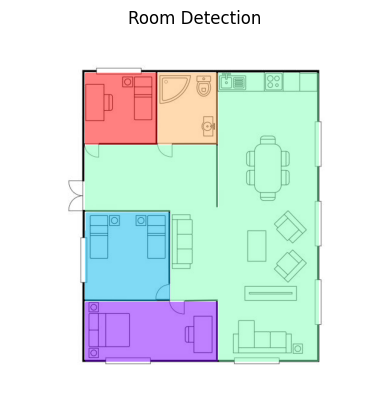

In [4]:
navigation.plot_rooms()

In [5]:
navigation = Indoor_Navigation('static/floor_plan_1.jpg',
                               'Demo floor plan',
                               grid_size=10)

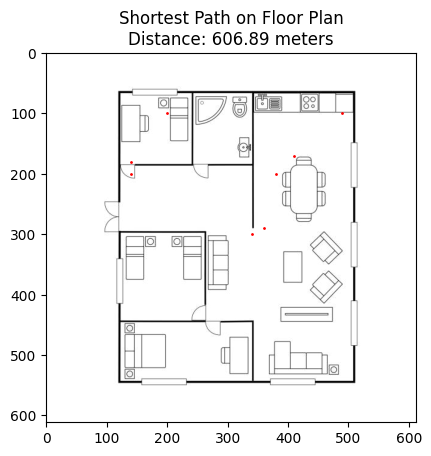

In [6]:
navigation.calculate_and_plot_route((200, 100), (500, 100), in_pixels=True)

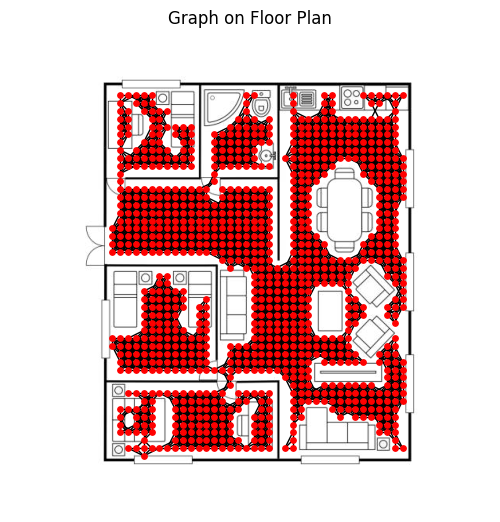

In [7]:
navigation.plot_graph()

In [8]:
navigation.save('static/navigation.pkl')

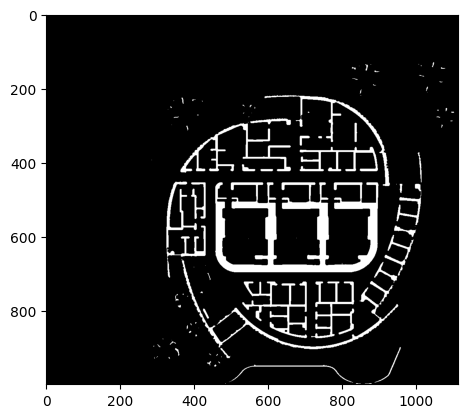

In [34]:
# plot image 'hospital_1.jpg'
image = cv2.imread('static/hospital_1.jpg')
# keep colors with low saturation
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.split(image)[1]
# apply threshold
_, mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
# original image to gray
image = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# apply mask
image = cv2.bitwise_or(image, mask)

filters = [gaussian_blur((5, 5), 5),
            adaptive_threshold(111, 25),
            morph_close(kernel(5)),
            ]
image_mask = apply_filters(image, filters)

plt.imshow(image_mask, cmap='gray')
plt.show()